In [21]:
import pandas as pd

xlsx_file_path = "Math_Data.xlsx"
df = pd.read_excel(xlsx_file_path)

print(df.to_string(index=False))


                     NAME  AGE  POVERTY  CASES  DEATHS
         Adams County, PA 44.0      8.6   4649      90
     Allegheny County, PA 40.7     11.3  54362    1036
     Armstrong County, PA 47.0     11.8   3507      70
        Beaver County, PA 44.9     11.1   8504     256
       Bedford County, PA 47.2     11.6   2969      97
         Berks County, PA 40.0     12.9  23758     571
         Blair County, PA 43.4     11.9   7956     176
      Bradford County, PA 44.0     13.7   3088      56
         Bucks County, PA 44.0      6.5  30891     908
        Butler County, PA 43.3      8.5   9442     201
       Cambria County, PA 45.5     12.9   8910     254
       Cameron County, PA 51.8     13.4    157       4
        Carbon County, PA 46.2     14.0   2834      90
        Centre County, PA 33.5     15.2   9031     142
       Chester County, PA 40.6      6.6  20648     520
       Clarion County, PA 41.6     11.8   2036      46
    Clearfield County, PA 45.2     14.2   4138      50
       Cli

In [22]:
import pandas as pd

# Assuming you already have your data in a DataFrame named 'df'

# Calculate the correlation between 'AGE' and 'DEATHS'
age_death_correlation = df['AGE'].corr(df['DEATHS'])

# Calculate the correlation between 'POVERTY' and 'DEATHS'
poverty_death_correlation = df['POVERTY'].corr(df['DEATHS'])

# Print the results
print(f"Correlation between 'AGE' and 'DEATHS': {age_death_correlation}")
print(f"Correlation between 'POVERTY' and 'DEATHS': {poverty_death_correlation}")


Correlation between 'AGE' and 'DEATHS': -0.4948678618918243
Correlation between 'POVERTY' and 'DEATHS': 0.060649291131292256


The correlation between 'AGE' and 'DEATHS' is approximately -0.495. This negative correlation suggests that as the average age in a specific location increases, the number of deaths tends to decrease, but the relationship is not very strong.

The correlation between 'POVERTY' and 'DEATHS' is approximately 0.061. This positive correlation suggests a weak positive relationship between the poverty rate and the number of deaths. In this case, as the poverty rate increases, the number of deaths may slightly increase, but the correlation is weak.

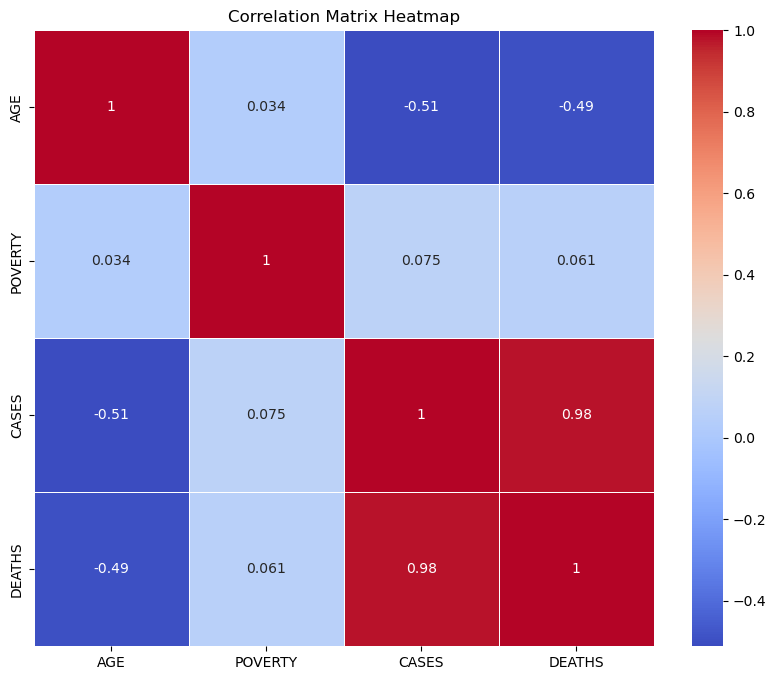

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have your data in a DataFrame named 'df'

# Select the numeric columns for which you want to calculate correlations
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))  # Set the figure size

# Customize the heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')

# Show the heatmap
plt.show()


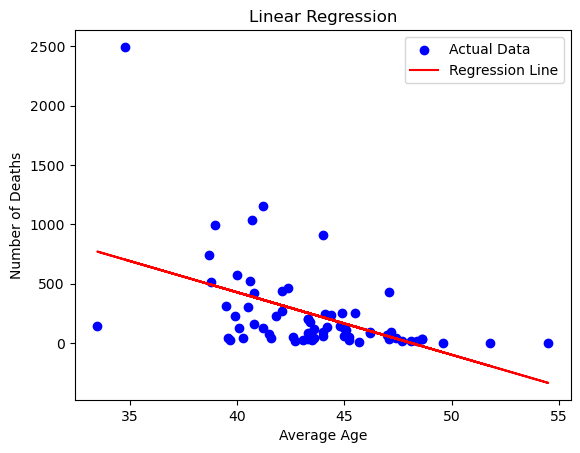

In [24]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming you already have your data in a DataFrame named 'df'

# Create the linear regression model
model = LinearRegression()

# Define your independent variable (X) and dependent variable (y)
X = df[['AGE']]  # Independent variable (e.g., age)
y = df['DEATHS']  # Dependent variable (e.g., number of deaths)

# Fit the linear regression model to your data
model.fit(X, y)

# Make predictions using the model
y_pred = model.predict(X)

# Plot the data and the regression line
plt.scatter(X, y, label='Actual Data', color='b')
plt.plot(X, y_pred, label='Regression Line', color='r')
plt.xlabel('Average Age')
plt.ylabel('Number of Deaths')
plt.title('Linear Regression')
plt.legend()
plt.show()


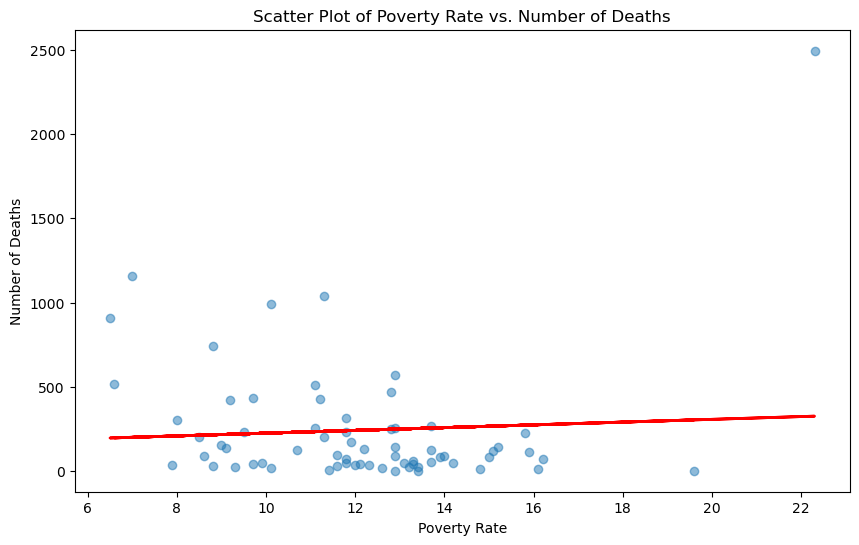

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming you already have your data in a DataFrame named 'df'

# Create a scatter plot
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot 'POVERTY' on the x-axis and 'DEATHS' on the y-axis
plt.scatter(df['POVERTY'], df['DEATHS'], alpha=0.5)
plt.xlabel('Poverty Rate')
plt.ylabel('Number of Deaths')
plt.title('Scatter Plot of Poverty Rate vs. Number of Deaths')

# Create a linear regression model
model = LinearRegression()
X = df[['POVERTY']]
y = df['DEATHS']
model.fit(X, y)

# Generate predictions from the model
y_pred = model.predict(X)

# Plot the regression line
plt.plot(X, y_pred, color='red', linewidth=2)

plt.show()


In [26]:
import pandas as pd
from scipy import stats
import numpy as np

# Assuming you already have your data in a DataFrame named 'df'

# Separate the data into two groups based on 'POVERTY'
below_threshold = df[df['POVERTY'] < 10]['AGE']
above_threshold = df[df['POVERTY'] >= 10]['AGE']

# Perform t-tests
t_statistic, p_value = stats.ttest_ind(below_threshold, above_threshold)

print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")


T-Statistic: -1.596823102210191
P-Value: 0.1151558431157544


In [28]:
import pandas as pd
import statsmodels.api as sm

# Assuming you already have your data in a DataFrame named 'df'

# Create an interaction term by multiplying 'AGE' and 'POVERTY'
df['AGE_POVERTY_INTERACTION'] = df['AGE'] * df['POVERTY']

# Create a linear regression model with interaction effects
X = df[['AGE', 'POVERTY', 'AGE_POVERTY_INTERACTION']]
X = sm.add_constant(X)  # Add a constant term (intercept)
y = df['DEATHS']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 DEATHS   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     12.05
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           2.47e-06
Time:                        16:34:48   Log-Likelihood:                -477.78
No. Observations:                  67   AIC:                             963.6
Df Residuals:                      63   BIC:                             972.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -3